# Relation between accuracy and the amount of data.
## The file `t-in_voc` grown in 22 chunks of 1043 verses in the order of the Hebrew Bible.

In [1]:
from pandas import read_csv

df = read_csv('growth.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 18 columns):
f_in          22 non-null object
f_out         22 non-null object
seqlen        22 non-null int64
lrate         22 non-null float64
epochs        22 non-null int64
epochs_syr    22 non-null int64
embsize       22 non-null int64
n_heads       22 non-null int64
n_enc         22 non-null int64
n_dec         22 non-null int64
network       22 non-null object
dropout       22 non-null float64
batchsize     22 non-null int64
complete      22 non-null float64
distinct      22 non-null object
job           22 non-null int64
times         22 non-null object
data_size     22 non-null int64
dtypes: float64(3), int64(10), object(5)
memory usage: 3.2+ KB


In [2]:
df

,f_in,f_out,seqlen,lrate,epochs,epochs_syr,embsize,n_heads,n_enc,n_dec,network,dropout,batchsize,complete,distinct,job,times,data_size
0,t-in_01043,t-out_01043,9,0.00028,20,0,512,8,3,3,transformer,0.14,128,0.000000,"[0.5637663885578069, 0.38259833134684146, 0.27...",9937,"(""10:55:54"", ""11:01:18"")",109320
1,t-in_02086,t-out_02086,9,0.00028,20,0,512,8,3,3,transformer,0.14,128,0.093010,"[0.7760044028618602, 0.7259218492019813, 0.687...",9938,"(""10:55:53"", ""11:06:19"")",226209
2,t-in_03129,t-out_03129,9,0.00028,20,0,512,8,3,3,transformer,0.14,128,0.219405,"[0.850790150679897, 0.8511576626240352, 0.8408...",9939,"(""10:55:54"", ""11:11:31"")",338382
3,t-in_04172,t-out_04172,9,0.00028,20,0,512,8,3,3,transformer,0.14,128,0.392025,"[0.8882336422353272, 0.8927267621454648, 0.885...",9940,"(""10:55:53"", ""11:16:07"")",445894
4,t-in_05215,t-out_05215,9,0.00028,20,0,512,8,3,3,transformer,0.14,128,0.459314,"[0.9096615108720018, 0.911454830755436, 0.9054...",9941,"(""10:55:53"", ""11:21:47"")",559978
5,t-in_06258,t-out_06258,9,0.00028,20,0,512,8,3,3,transformer,0.14,128,0.532866,"[0.9197198275862069, 0.9227729885057471, 0.924...",9942,"(""10:55:54"", ""11:28:22"")",686498
6,t-in_07301,t-out_07301,9,0.00028,20,0,512,8,3,3,transformer,0.14,128,0.591045,"[0.9326145552560647, 0.9363581910751722, 0.937...",9943,"(""10:55:53"", ""11:35:06"")",820240
7,t-in_08344,t-out_08344,9,0.00028,20,0,512,8,3,3,transformer,0.14,128,0.590691,"[0.9366304072856059, 0.9409309385277005, 0.939...",9944,"(""10:55:54"", ""11:41:46"")",956809
8,t-in_09387,t-out_09387,9,0.00028,20,0,512,8,3,3,transformer,0.14,128,0.605446,"[0.9413515599162166, 0.9452100099217285, 0.941...",9945,"(""11:01:48"", ""12:01:09"")",1090051
9,t-in_10430,t-out_10430,9,0.00028,20,0,512,8,3,3,transformer,0.14,128,0.630454,"[0.9465633885675067, 0.9505833905284832, 0.946...",9946,"(""11:06:49"", ""12:07:00"")",1222918


In [3]:
# Add a column with the highest score on the distinct words.
df['wordscore'] = df['distinct'].apply(eval).apply(max)

In [4]:
# Choose the target we want to investigate.
# This can be either 'complete' or 'wordscore'.
target = 'complete'
target = 'wordscore'

In [5]:
# The data size is displayed in MB
x = df['data_size'].values / 1e6
y = df[target].values

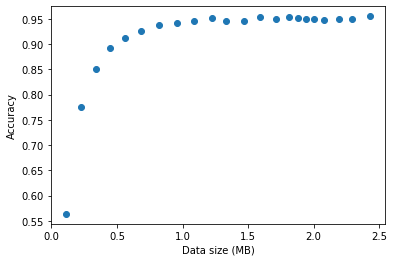

In [6]:
# Create a scatter plot of the values
from matplotlib.pyplot import plot, xlabel, ylabel

xlabel('Data size (MB)')
ylabel('Accuracy')

plot(x, y, 'o')

It looks as if we can model this well with one of the familiar sigmoid functions.

In [7]:
from numpy import sqrt
from scipy.optimize import curve_fit

def f(x,a,b,c):
    return a*(x) / sqrt(1+b*x*x) + c

fit = curve_fit(f, x, y)
[a,b,c] = fit[0]

The coefficient of determination R-squared is a measure for the goodness of fit. It should be very close to 1.

In [8]:
from numpy import mean, sum

# Return the coefficient of determination of the predicted values (y1)
# against the observed values (y0).

def r_squared(y0, y1):
    residuals = y0 - y1
    ss_res = sum(residuals**2)
    ss_tot = sum((y0 - mean(y0))**2)
    return 1 - (ss_res / ss_tot)

print(f'R2 = {r_squared(y, f(x,a,b,c))}.')

R2 = 0.9991097248578641.


This looks like a good enough fit, so let us plot it.

Estimated attainable accuracy: 0.955.


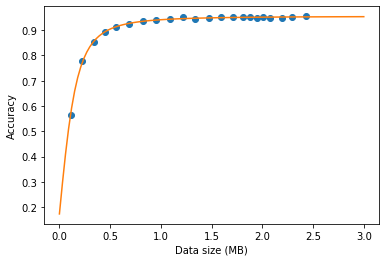

In [9]:
from numpy import ceil, linspace

xi = linspace(0, ceil(x[-1]), 101)

xlabel('Data size (MB)')
ylabel('Accuracy')

plot(x, y, 'o')
plot(xi, f(xi,a,b,c))

optimum = a/sqrt(b) + c
print(f'Estimated attainable accuracy: {optimum:.3f}.')

Unlike the data points, the fitted function is not noisy and enables us to estimate the amount of data we need in order to get to 1% of the attainable accuracy.

In [10]:
from scipy.optimize import root_scalar

goal = 0.99

def f_opt(x,a,b,c):
    return f(x,a,b,c) - goal * optimum

root = root_scalar(f_opt, (a,b,c), bracket=[xi[0], xi[-1]]).root

print(f'Within {100*(1-goal):g}% of estimated attainable accuracy at {root:.1f} MB of data.')

Within 1% of estimated attainable accuracy at 1.2 MB of data.


The size of the Syriac data in `s-in` is 0.2 MB (187699 bytes), which suggests that we need sixfold this amount.